## Loading Necessary Libraries and Data

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('spam.tsv', sep='\t')
df

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1


In [5]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [6]:
df.tail()

,label,message,length,punct
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1
5571,ham,Rofl. Its true to its name,26,1


In [7]:
#No of values that are missing
df.isna()

,label,message,length,punct
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
5567,False,False,False,False
5568,False,False,False,False
5569,False,False,False,False
5570,False,False,False,False


In [8]:
df.isna().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [9]:
df.describe()

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


# Balancing the data

In [10]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [11]:
ham = df[df['label']=='ham']
spam = df[df['label']=='spam']
ham.shape,spam.shape

((4825, 4), (747, 4))

In [12]:
ham = ham.sample(spam.shape[0])
ham.shape,spam.shape

((747, 4), (747, 4))

In [13]:
OData = ham.append(spam, ignore_index=True)
OData.shape

(1494, 4)

In [14]:
OData['label'].value_counts()

spam    747
ham     747
Name: label, dtype: int64

In [15]:
OData.head()

,label,message,length,punct
0,ham,Nothing. Can...,15,4
1,ham,Any chance you might have had with me evaporat...,232,4
2,ham,Shopping? Eh ger i toking abt syd leh...Haha,44,4
3,ham,How much is torch in 9ja.,25,1
4,ham,No..jst change tat only..,25,4


## Exploratory Analysis

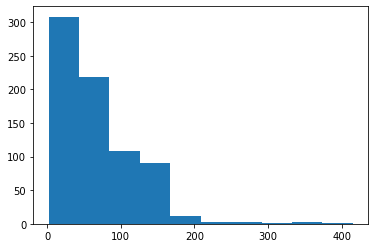

In [16]:
plt.hist(OData[OData['label']=='ham']['length'])
plt.show()

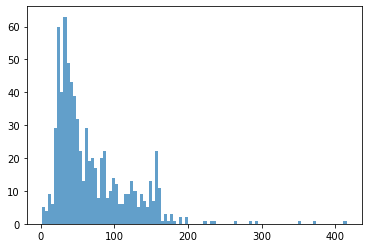

In [17]:
plt.hist(OData[OData['label']=='ham']['length'], bins = 100, alpha=0.7)
plt.show()

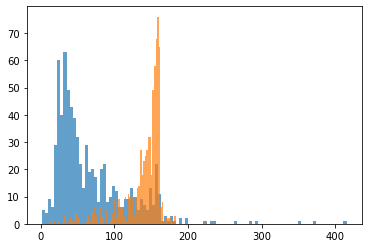

In [18]:
plt.hist(OData[OData['label']=='ham']['length'], bins = 100, alpha=0.7)
plt.hist(OData[OData['label']=='spam']['length'], bins = 100, alpha=0.7)
plt.show()

## Splitting the data into testing and training

In [19]:
OData

,label,message,length,punct
0,ham,Nothing. Can...,15,4
1,ham,Any chance you might have had with me evaporat...,232,4
2,ham,Shopping? Eh ger i toking abt syd leh...Haha,44,4
3,ham,How much is torch in 9ja.,25,1
4,ham,No..jst change tat only..,25,4
...,...,...,...,...
1489,spam,Want explicit SEX in 30 secs? Ring 02073162414...,90,3
1490,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158,5
1491,spam,Had your contract mobile 11 Mnths? Latest Moto...,160,8
1492,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147,3


In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(OData['message'], OData['label'], test_size = 0.3, random_state = 0, shuffle = True)

In [21]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1045,), (449,), (1045,), (449,))

## Applying Random Forest  Algorithm

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [23]:
classifier = Pipeline([("tfidf",TfidfVectorizer()) , ("classifier",RandomForestClassifier(n_estimators=100))])
classifier.fit(x_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', RandomForestClassifier())])

In [24]:
y_pred = classifier.predict(x_test)

In [25]:
y_test,y_pred

(799     spam
 1047    spam
 1436    spam
 54       ham
 793     spam
         ... 
 824     spam
 822     spam
 644      ham
 1034    spam
 1356    spam
 Name: label, Length: 449, dtype: object,
 array(['spam', 'spam', 'spam', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
        'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'spam', 'spam', 'ham',
        'ham', 'spam', 'spam', 'ham', 'spam', 'spam', 'ham', 'spam', 'ham',
        'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'spam', 'spam',
        'spam', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'spam', 'ham',
        'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
        'spam', 'spam', 'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham',
        'ham', 'spam', 'spam', 'ham', 'ham', 'ham', 'spam', 'spam', 'spam',
        'spam', 'spam', 'ham', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
        'spam', 'ham', 'ham', 'ham', 'ham', 'spam', 'spam', 'ham', 'spam',
        'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'spam'

In [26]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [27]:
print(accuracy_score(y_test , y_pred))

0.9487750556792873


In [28]:
print(confusion_matrix(y_test , y_pred))

[[226   1]
 [ 22 200]]


In [29]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

         ham       0.91      1.00      0.95       227
        spam       1.00      0.90      0.95       222

    accuracy                           0.95       449
   macro avg       0.95      0.95      0.95       449
weighted avg       0.95      0.95      0.95       449



## Applying Support Vector Machine(SVM) Algorithm

In [35]:
from sklearn.svm import SVC
svm = Pipeline([("tfidf",TfidfVectorizer()) , ("classifier",SVC(C= 100, gamma ='auto'))])
svm.fit(x_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', SVC(C=100, gamma='auto'))])

In [36]:
y_pred = svm.predict(x_test)
print(accuracy_score(y_test , y_pred))

0.9398663697104677


In [37]:
print(confusion_matrix(y_test , y_pred))

[[223   4]
 [ 23 199]]


In [38]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

         ham       0.91      0.98      0.94       227
        spam       0.98      0.90      0.94       222

    accuracy                           0.94       449
   macro avg       0.94      0.94      0.94       449
weighted avg       0.94      0.94      0.94       449



## Testing our model by passing real time examples

In [39]:
test1 = ['Hello you are learning natural Language Processing']
test2 = ['Hope you are doing things and learning good']
test3 = ['Congratulatiions, you won a lottery ticket worth $1 million! to claim call on 446677']

In [40]:
print(svm.predict(test1))
print(svm.predict(test2))
print(svm.predict(test3))

['ham']
['ham']
['spam']


In [41]:
print(classifier.predict(test1))
print(classifier.predict(test2))
print(classifier.predict(test3))

['ham']
['ham']
['spam']


In [47]:
test4 = ['Hi sushil how are you doing?']
test5 = ['You won a car worth $1 million, to claim it call 626564']
test6 = ['How was your day?']

In [48]:
print(RFclassifier.predict(test4))
print(RFclassifier.predict(test5))
print(RFclassifier.predict(test6))

['ham']
['spam']
['ham']
